In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [5]:
train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [6]:
test

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [7]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [8]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joining       12250 non-null  object 
 2   Gender                12250 non-null  object 
 3   Company Type          12250 non-null  object 
 4   WFH Setup Available   12250 non-null  object 
 5   Designation           12250 non-null  float64
 6   Resource Allocation   12250 non-null  float64
 7   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,22750.0,2.178725,1.135145,0.0,1.00,2.00,3.00,5.0
Resource Allocation,21369.0,4.481398,2.047211,1.0,3.00,4.00,6.00,10.0
Mental Fatigue Score,20633.0,5.728188,1.920839,0.0,4.60,5.90,7.10,10.0
Burn Rate,21626.0,0.452005,0.198226,0.0,0.31,0.45,0.59,1.0


In [12]:
train.drop('Employee ID' ,axis=1,inplace=True)

In [13]:
train = pd.get_dummies(train,columns=['Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation'],drop_first=True)

In [14]:
train.head()

,Date of Joining,Mental Fatigue Score,Burn Rate,Gender_Male,Company Type_Service,WFH Setup Available_Yes,Designation_1.0,Designation_2.0,Designation_3.0,Designation_4.0,Designation_5.0,Resource Allocation_2.0,Resource Allocation_3.0,Resource Allocation_4.0,Resource Allocation_5.0,Resource Allocation_6.0,Resource Allocation_7.0,Resource Allocation_8.0,Resource Allocation_9.0,Resource Allocation_10.0
0,2008-09-30,3.8,0.16,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2008-11-30,5.0,0.36,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2008-03-10,5.8,0.49,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-11-03,2.6,0.20,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-07-24,6.9,0.52,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [15]:
train.shape

(22750, 20)

In [16]:
train.isnull().sum()

Date of Joining                0
Mental Fatigue Score        2117
Burn Rate                   1124
Gender_Male                    0
Company Type_Service           0
WFH Setup Available_Yes        0
Designation_1.0                0
Designation_2.0                0
Designation_3.0                0
Designation_4.0                0
Designation_5.0                0
Resource Allocation_2.0        0
Resource Allocation_3.0        0
Resource Allocation_4.0        0
Resource Allocation_5.0        0
Resource Allocation_6.0        0
Resource Allocation_7.0        0
Resource Allocation_8.0        0
Resource Allocation_9.0        0
Resource Allocation_10.0       0
dtype: int64

In [17]:
train.dropna(axis = 0,inplace=True)

In [18]:
train.isnull().sum()

Date of Joining             0
Mental Fatigue Score        0
Burn Rate                   0
Gender_Male                 0
Company Type_Service        0
WFH Setup Available_Yes     0
Designation_1.0             0
Designation_2.0             0
Designation_3.0             0
Designation_4.0             0
Designation_5.0             0
Resource Allocation_2.0     0
Resource Allocation_3.0     0
Resource Allocation_4.0     0
Resource Allocation_5.0     0
Resource Allocation_6.0     0
Resource Allocation_7.0     0
Resource Allocation_8.0     0
Resource Allocation_9.0     0
Resource Allocation_10.0    0
dtype: int64

In [19]:
corr_matrix = train.corr()
corr_matrix['Burn Rate'].sort_values(ascending = False)

Burn Rate                   1.000000
Mental Fatigue Score        0.944546
Designation_4.0             0.406585
Resource Allocation_7.0     0.315741
Resource Allocation_8.0     0.315711
Designation_3.0             0.281254
Resource Allocation_9.0     0.273632
Designation_5.0             0.269076
Resource Allocation_6.0     0.244984
Resource Allocation_10.0    0.187675
Gender_Male                 0.157553
Resource Allocation_5.0     0.093592
Company Type_Service        0.003821
Designation_2.0            -0.058064
Resource Allocation_4.0    -0.076613
Resource Allocation_3.0    -0.229055
WFH Setup Available_Yes    -0.305917
Resource Allocation_2.0    -0.316712
Designation_1.0            -0.377811
Name: Burn Rate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


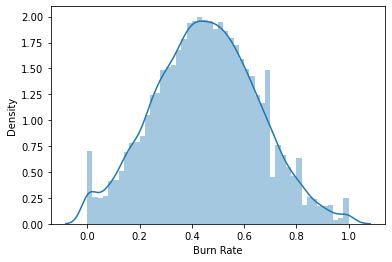

In [22]:
import seaborn as sns
sns.distplot(train['Burn Rate'])

In [23]:
train.drop_duplicates(inplace=True)

In [24]:
train.shape

(19675, 20)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19675 entries, 0 to 22749
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date of Joining           19675 non-null  object 
 1   Mental Fatigue Score      19675 non-null  float64
 2   Burn Rate                 19675 non-null  float64
 3   Gender_Male               19675 non-null  uint8  
 4   Company Type_Service      19675 non-null  uint8  
 5   WFH Setup Available_Yes   19675 non-null  uint8  
 6   Designation_1.0           19675 non-null  uint8  
 7   Designation_2.0           19675 non-null  uint8  
 8   Designation_3.0           19675 non-null  uint8  
 9   Designation_4.0           19675 non-null  uint8  
 10  Designation_5.0           19675 non-null  uint8  
 11  Resource Allocation_2.0   19675 non-null  uint8  
 12  Resource Allocation_3.0   19675 non-null  uint8  
 13  Resource Allocation_4.0   19675 non-null  uint8  
 14  Resour

In [26]:
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'],errors='coerce')

In [27]:
import datetime as dt
train['Date_of_Joining_year'] = train['Date of Joining'].dt.year
train['Date_of_Joining_month'] = train['Date of Joining'].dt.month
train['Date_of_Joining_week'] = train['Date of Joining'].dt.week
train['Date_of_Joining_day'] = train['Date of Joining'].dt.day
train['Date_of_Joining_dayofweek'] = train['Date of Joining'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [28]:
train.drop('Date of Joining',axis=1,inplace=True)

In [29]:
train.shape

(19675, 24)

In [30]:
X = train.drop('Burn Rate',axis=1)
Y = train['Burn Rate']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(np.array(X),np.array(Y),test_size=0.2,random_state=42)

In [32]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15740, 23), (3935, 23), (15740,), (3935,))

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
s1 = r2_score(Y_test,pred)
s1

0.9181895550873127

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred_dt = (dtr.predict(X_test))
s2 = r2_score(Y_test,pred_dt)
s2

0.8480696321007661

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=800)
rf.fit(X_train,Y_train)
pred_rf = rf.predict(X_test)
s3 = r2_score(Y_test,pred_rf)
s3

0.9188637836481293

In [39]:
test = pd.read_csv('/content/test.csv')
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [41]:
test.drop('Employee ID' ,axis=1,inplace=True)

In [43]:
test['Date of Joining'] = pd.to_datetime(test['Date of Joining'])

In [44]:
test = pd.get_dummies(test,columns=['Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation'],drop_first=True)

In [45]:
import datetime as dt
test['Date_of_Joining_year'] = test['Date of Joining'].dt.year
test['Date_of_Joining_month'] = test['Date of Joining'].dt.month
test['Date_of_Joining_week'] = test['Date of Joining'].dt.week
test['Date_of_Joining_day'] = test['Date of Joining'].dt.day
test['Date_of_Joining_dayofweek'] = test['Date of Joining'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [46]:
test.drop('Date of Joining',axis=1,inplace=True)

In [47]:
test = sc.transform(test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [55]:
gd =GradientBoostingRegressor()
gd.fit(X_train,Y_train)
pred_gd = gd.predict(X_test)
s4 = r2_score(Y_test,pred_gd)
s4

0.9228745881118934

In [56]:
lgb = LGBMRegressor()
lgb.fit(X_train,Y_train,eval_set = (X_test,Y_test),early_stopping_rounds=1000)
pred_lgb = lgb.predict(X_test)
s5 = r2_score(Y_test,pred_lgb)
s5

[1]	valid_0's l2: 0.0328209
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l2: 0.0273079
[3]	valid_0's l2: 0.0228293
[4]	valid_0's l2: 0.0191804
[5]	valid_0's l2: 0.016211
[6]	valid_0's l2: 0.0137906
[7]	valid_0's l2: 0.0118261
[8]	valid_0's l2: 0.0102186
[9]	valid_0's l2: 0.00891152
[10]	valid_0's l2: 0.007839
[11]	valid_0's l2: 0.00696327
[12]	valid_0's l2: 0.00624337
[13]	valid_0's l2: 0.00565577
[14]	valid_0's l2: 0.00517661
[15]	valid_0's l2: 0.00478412
[16]	valid_0's l2: 0.00446212
[17]	valid_0's l2: 0.00419779
[18]	valid_0's l2: 0.0039832
[19]	valid_0's l2: 0.00380779
[20]	valid_0's l2: 0.00366053
[21]	valid_0's l2: 0.00354035
[22]	valid_0's l2: 0.00344089
[23]	valid_0's l2: 0.00335642
[24]	valid_0's l2: 0.00328464
[25]	valid_0's l2: 0.00322868
[26]	valid_0's l2: 0.0031783
[27]	valid_0's l2: 0.00313605
[28]	valid_0's l2: 0.00310399
[29]	valid_0's l2: 0.00307486
[30]	valid_0's l2: 0.00304878
[31]	valid_0's l2: 0.00302977
[32]	valid_0's l2: 0.0030133

0.9261186655760011

In [60]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators = 3000,learning_rate=0.01)
xg.fit(X_train,Y_train)
pred_xg = xg.predict(X_test)
s6 = r2_score(Y_test,pred_xg)
s6

[14:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9253421309838267

In [57]:
avg = StackingCVRegressor(regressors=(lgb,rf,gd),meta_regressor=lgb,use_features_in_secondary=False)

In [58]:
avg.fit(X_train,Y_train)
test_stack = avg.predict(test)

In [61]:
test_lg = lgb.predict(test)
test_rf = rf.predict(test)
test_xg = xg.predict(test)
test_gd = gd.predict(test)
test_lr = lr.predict(test)
final_test = (test_lg*0.6 + test_rf*0.1 + test_xg*0.1 + test_gd*0.1 + test_lr*0.1)

In [64]:
test = pd.read_csv('/content/test.csv')

In [65]:
submit = pd.DataFrame()
submit['Employee ID'] = test['Employee ID']

In [66]:
submit['Burn Rate'] = final_test.round(2)

In [67]:
submit.head()

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.61
1,fffe31003300310037003800,0.35
2,fffe33003400380035003900,0.43
3,fffe3100370039003200,0.37
4,fffe32003600390036003700,0.53


In [68]:
submit.to_csv('submit.csv',index=False)